In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
names = ["mpg",
"cylinders",
"displacement",
"horsepower",
"weight",
"acceleration",
"model year",
"origin",
"car name"]

cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=names)

In [6]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


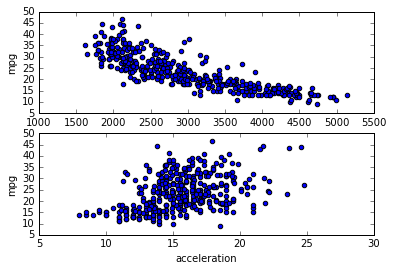

In [20]:
fig, (ax1, ax2) = plt.subplots(2,1)
cars.plot("weight", "mpg", kind="scatter", ax=ax1)
cars.plot("acceleration", "mpg", kind="scatter", ax=ax2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1144437f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1176990b8>]], dtype=object)

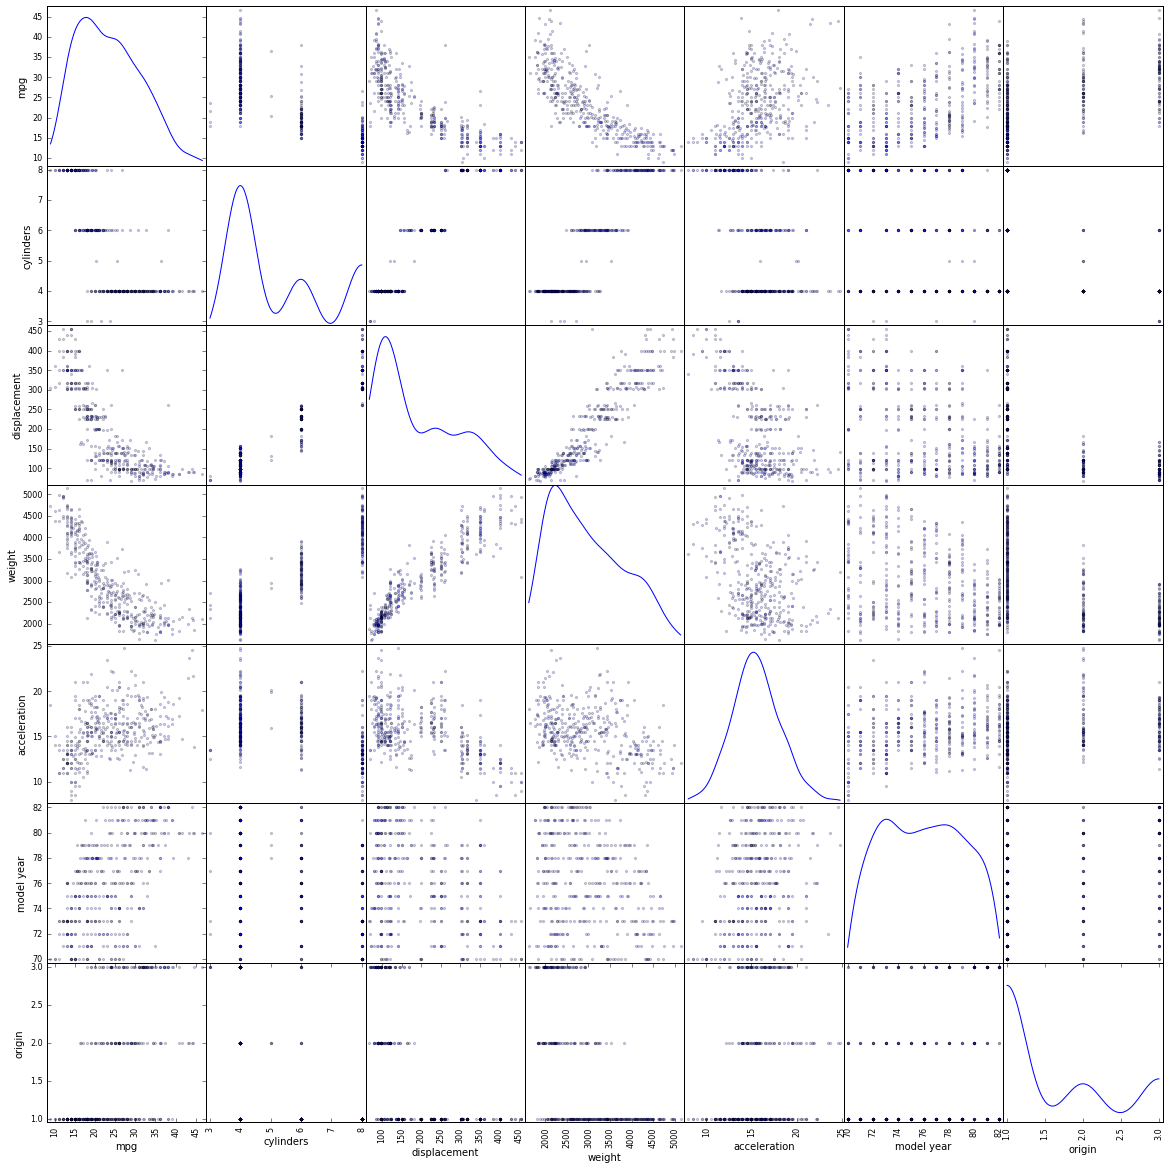

In [27]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(cars, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [30]:
cars[["weight"]].values[:10]

array([[ 3504.],
       [ 3693.],
       [ 3436.],
       [ 3433.],
       [ 3449.],
       [ 4341.],
       [ 4354.],
       [ 4312.],
       [ 4425.],
       [ 3850.]])

In [31]:
cars["weight"].values[:10]

array([ 3504.,  3693.,  3436.,  3433.,  3449.,  4341.,  4354.,  4312.,
        4425.,  3850.])

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[["weight"]].values, cars["mpg"].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# fit the model and predict on training data to check the model works at all
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[["weight"]], cars["mpg"])

predictions = lr.predict(cars[["weight"]])

print(predictions[:5])
print(cars["mpg"].values[:5])

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]
[ 18.  15.  18.  16.  17.]


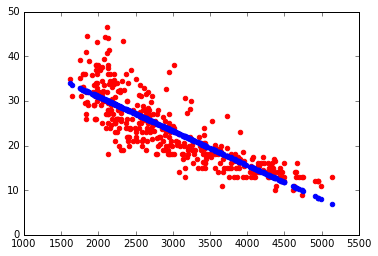

In [52]:
fig, ax = plt.subplots()
ax.scatter(cars["weight"], cars["mpg"], color="red")
ax.scatter(cars["weight"], predictions, color="blue")
plt.show()

In [53]:
# mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(cars["mpg"], predictions)

18.780939734628394

In [54]:
mse = mean_squared_error(cars["mpg"], predictions)
rmse = mse ** 0.5
rmse  # this is in mpg

4.3336981591509574

In [55]:
efficient_cars = cars["mpg"] > 30

In [58]:
cars[(efficient_cars == True)].shape

(85, 9)

In [59]:
cars.shape

(398, 9)

In [60]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [63]:
(cars["mpg"] > 30) & (cars["cylinders"] < 8)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
368    False
369     True
370     True
371    False
372    False
373    False
374    False
375     True
376     True
377     True
378     True
379     True
380     True
381     True
382     True
383     True
384     True
385     True
386    False
387     True
388    False
389    False
390     True
391     True
392    False
393    False
394     True
395     True
396    False
397     True
dtype: bool

In [64]:
import numpy as np

In [65]:
np.random.permutation(10)

array([8, 3, 6, 7, 1, 5, 2, 9, 4, 0])